#Import module

In [1]:
pip install sastrawi

     |████████████████████████████████| 209 kB 5.5 MB/s 


In [2]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

In [3]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

#Import data

## Import data asli & cek

In [4]:
#mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#read data
df = pd.read_csv('/content/drive/MyDrive/Dataset/BNPB.csv', sep=";")
df

,No.,ID Kabupaten,Tanggal Kejadian,Kejadian,Lokasi,Kabupaten,Provinsi,Kronologi & Dokumentasi,Penyebab,Meninggal,Hilang,Terluka,Rumah Rusak,Fasum Rusak
0,1,1601,31/12/2021,BANJIR,Kec. Lubuk Batang Ds. Gunung Meraksa,OGAN KOMERING ULU,SUMATERA SELATAN,NaN,● Dipicu oleh hujan dengan intensitas tinggi d...,0,0,0,0,0
1,2,1111,31/12/2021,BANJIR,Kec. Dewantara Gp. Tambon Tunong Gp. Uteun ge...,ACEH UTARA,ACEH,NaN,● Dipicu oleh hujan dengan intensitas tinggi d...,3,0,0,1,0
2,3,1213,31/12/2021,BANJIR,Kec. Pematang Jaya Ds. Damar Condong,LANGKAT,SUMATERA UTARA,NaN,● Dipicu oleh dengan intensitas curah hujan ya...,0,0,0,0,0
3,4,1221,31/12/2021,BANJIR,● Kec. Batang Lobu Sutam - Ds. Tanjung Baru - ...,PADANG LAWAS,SUMATERA UTARA,NaN,Dipicu hujan deras dengan durasi panjang menga...,0,0,0,637,1
4,5,3374,31/12/2021,BANJIR,Kec. Gayamsari Kel. Tambakrejo Kel. Kaligawe K...,KOTA SEMARANG,JAWA TENGAH,NaN,Dipicu hujan dengan intensitas tinggi di wilay...,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2963,2964,3216,01/01/2020,BANJIR,Kec. Tambun Selatan Kel. Jatimulya Kel. Tambun...,BEKASI,JAWA BARAT,NaN,• Hujan dengan intensitas sedang-lebat.,1,0,0,4,0
2964,2965,3525,01/01/2020,BANJIR,Kec. Balongpanggang Ds. Banjar Agung Ds. Waton...,GRESIK,JAWA TIMUR,NaN,• Peningkatan debit air sungai kali Lamong dan...,0,0,0,0,0
2965,2966,3674,01/01/2020,BANJIR,Kec Ciputat Kel Ciputat Kec Jombang Kel Rawale...,KOTA TANGERANG SELATAN,BANTEN,NaN,NaN,4,0,0,0,0
2966,2967,6372,01/01/2020,BANJIR,KEC CEMPAKA KEL CEMPAKA,KOTA BANJARBARU,KALIMANTAN SELATAN,NaN,NaN,0,0,0,0,0


In [6]:
df.isna().sum()

No.                           0
ID Kabupaten                  0
Tanggal Kejadian              0
Kejadian                      0
Lokasi                       32
Kabupaten                     0
Provinsi                      0
Kronologi & Dokumentasi    2734
Penyebab                    482
Meninggal                     0
Hilang                        0
Terluka                       0
Rumah Rusak                   0
Fasum Rusak                   0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2968 entries, 0 to 2967
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   No.                      2968 non-null   int64 
 1   ID Kabupaten             2968 non-null   int64 
 2   Tanggal Kejadian         2968 non-null   object
 3   Kejadian                 2968 non-null   object
 4   Lokasi                   2936 non-null   object
 5   Kabupaten                2968 non-null   object
 6   Provinsi                 2968 non-null   object
 7   Kronologi & Dokumentasi  234 non-null    object
 8   Penyebab                 2486 non-null   object
 9   Meninggal                2968 non-null   int64 
 10  Hilang                   2968 non-null   int64 
 11  Terluka                  2968 non-null   int64 
 12  Rumah Rusak              2968 non-null   int64 
 13  Fasum Rusak              2968 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 324

##Buat DataFrame baru khusus text penyebab

In [8]:
data = [df["No."], df["Penyebab"]]
headers = ["no", "Penyebab"]
df2 = pd.concat(data, axis=1, keys=headers)

In [9]:
df2.isna().sum()

no            0
Penyebab    482
dtype: int64

In [10]:
df2 = df2.dropna()

In [11]:
df2.isna().sum()

no          0
Penyebab    0
dtype: int64

In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2486 entries, 0 to 2964
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   no        2486 non-null   int64 
 1   Penyebab  2486 non-null   object
dtypes: int64(1), object(1)
memory usage: 58.3+ KB


#cleaning text

In [13]:
df2["Penyebab"] = df2["Penyebab"].astype(str)

In [14]:
def wregex(text):
  text = re.sub(r'[^.,a-zA-Z0-9 \n\.]',' ',text) #remove symbol
  text = re.sub('[\s]+', ' ', text) #menghilangkan additional whitespace
  text = re.sub(r'[^\w\s]','',text) #remove punctuation
  text = text.strip() #menghilangkan enter, tab, dll
  return text

In [15]:
df2["Penyebab"] = df2["Penyebab"].apply(wregex)

In [16]:
def akronim(text):
  text = re.sub("DAS","daerah aliran sungai",text)
  text = re.sub("DAM","bendungan",text)
  text = re.sub("TMA","tinggi muka air",text)
  return text

In [17]:
df2["Penyebab"] = df2["Penyebab"].apply(akronim)

In [18]:
def error_spelling(text):
  text = text.lower()
  text = re.sub("intentitas","intensitas", text)
  text = re.sub("instensitas","intensitas", text)
  text = re.sub("insensitas","intensitas", text)
  text = re.sub("insentitas","intensitas", text)
  text = re.sub("itensitas","intensitas", text)
  text = re.sub("intesitas","intensitas", text)
  text = re.sub("intersita","intensitas", text)
  text = re.sub("intensitras","intensitas", text)
  text = re.sub("insnitas","intensitas", text)
  text = re.sub("intensi ","intensitas ", text)
  text = re.sub("inetensitas","intensitas", text)
  text = re.sub("intesits","intensitas ", text)
  text = re.sub("ekstrim","ekstrem", text)
  text = re.sub("extrem","ekstrem", text)
  text = re.sub("debet","debit", text)
  text = re.sub("drinase","drainase", text)
  text = re.sub("draenase","drainase", text)
  text = re.sub("dranise","drainase", text)
  text = re.sub("drainasi","drainase", text)
  text = re.sub("drenaise","drainase", text)
  text = re.sub("sungau","sungai", text)
  text = re.sub("aktifitas","aktivitas", text)
  text = re.sub("aktifiatas","aktivitas", text)
  text = re.sub("hujuan","hujan", text)
  text = re.sub("rjngan","ringan", text)
  text = re.sub("nopember","november", text)
  text = re.sub("nopeember","november", text)
  text = re.sub("semalah ","semalam ", text)
  text = re.sub("mempu ","mampu ", text)
  text = re.sub("yterjadi","terjadi", text)
  text = re.sub("angina","angin", text)
  text = re.sub("pertir","petir", text)
  text = re.sub("menyebankan","menyebabkan", text)
  text = re.sub("sendimentasi","sedimentasi", text)
  text = re.sub("wilayak","wilayah", text)
  text = re.sub("jembol","jebol", text)
  text = re.sub("degnna","dengan", text)
  text = re.sub("dikernakan","dikarenakan", text)
  text = re.sub("kenncang","kencang", text)
  text = re.sub("tuyang","yang", text)
  text = re.sub(" eks "," bekas ", text)
  text = re.sub("ambruk","roboh", text)
  text = re.sub("urugan","timbunan", text)
  text = re.sub(" tak "," tidak ", text)
  text = re.sub("kali","sungai", text)
  text = re.sub("system","sistem", text)
  text = re.sub("julii","juli", text)
  text = re.sub("tinggii","tinggi", text)
  text = re.sub("meluaonya","meluapnya", text)
  text = re.sub("dand ","dan ", text)
  text = re.sub("nenyebabkan","menyebabkan", text)
  text = re.sub("warrga","warga", text)
  text = re.sub("kemaren","kemarin", text)
  text = re.sub("suungai","sungai", text)
  text = re.sub("memadahi","memadai", text)
  text = re.sub("jebols","jebol", text)
  text = re.sub(" jum at "," jumat ", text)
  text = re.sub("suangai","sungai", text)
  #text = re.sub("","", text)
  return text

In [19]:
df2["Penyebab"] = df2["Penyebab"].apply(error_spelling)

In [20]:
def incomplete_word(text):
  #text = text.lower()
  text = re.sub("seta","serta", text)
  text = re.sub("strutur","struktur", text)
  text = re.sub("dengn","dengan", text)
  text = re.sub("sugai","sungai", text)
  text = re.sub("terjdi","terjadi", text)
  text = re.sub("rmh","rumah", text)
  text = re.sub("lokas ","lokasi ", text)
  text = re.sub("karna","karena", text)
  text = re.sub("yg","yang", text)
  text = re.sub("dgn","dengan", text)
  text = re.sub("pkl","pukul", text)
  text = re.sub("selsa","selasa", text)
  text = re.sub("wilaya ","wilayah ", text)
  text = re.sub("mamp ","mampu ", text)
  text = re.sub(" ujan"," hujan", text)
  text = re.sub("di setai","disertai", text)
  text = re.sub("sunga ","sungai ", text)
  text = re.sub("krn","karena", text)
  text = re.sub("gelobang","gelombang", text)
  text = re.sub(" sal "," saluran ", text)
  text = re.sub("tingi","tinggi", text)
  text = re.sub("ds","desa", text)
  text = re.sub("tgl","tanggal", text)
  text = re.sub("jl","jalan", text)
  text = re.sub("jln","jalan", text)
  text = re.sub("kec ","kecamatan ", text)
  text = re.sub("cm","centimeter", text)
  text = re.sub("peb ","februari ", text)
  text = re.sub("dsn","dusun", text)
  text = re.sub("meluapna","meluapnya", text)
  text = re.sub("jebatan","jembatan", text)
  text = re.sub("ikarenakan","dikarenakan", text)
  text = re.sub(" engakibatkan"," mengakibatkan", text)
  text = re.sub("bengawa ","bengawan ", text)
  text = re.sub("sehinga","sehingga", text)
  text = re.sub("gg ","gang ", text)
  text = re.sub(" kibat"," akibat", text)
  text = re.sub("melapnya","meluapnya", text)
  text = re.sub("lab ","laboratorium ", text)
  text = re.sub("kp ","kampung ", text)
  text = re.sub("kep ","kepulauan ", text)
  text = re.sub("kab ","kabupaten ", text)
  text = re.sub("ds ","desa ", text)
  text = re.sub("kel ","kelurahan ", text)
  text = re.sub("des ","desember ", text)
  text = re.sub("prov ","provinsi ", text)
  text = re.sub(" sd "," sampai dengan ", text)
  text = re.sub(" s d "," sampai dengan ", text)
  text = re.sub("sunga ","sungai ", text)
  #text = re.sub("","", text)
  return text

In [21]:
df2["Penyebab"] = df2["Penyebab"].apply(incomplete_word)

In [22]:
def missing_space(text):
  #text = text.lower()
  text = re.sub("masukkerumah","masuk ke rumah", text)
  text = re.sub("fungsilahan","fungsi lahan", text)
  text = re.sub("salahsatu","salah satu", text)
  text = re.sub("witmengakibatkan","wit mengakibatkan", text)
  text = re.sub("pawaemengakibatkan","pawae mengakibatkan", text)
  text = re.sub("tinggidan","tinggi dan", text)
  text = re.sub("salirigasi","saluran irigasi", text)
  text = re.sub("kebeberapa","ke beberapa", text)
  text = re.sub("akibathujan","akibat hujan", text)
  text = re.sub("danmeluap","dan meluap", text)
  text = re.sub("banjirupaya","banjir upaya", text)
  text = re.sub("hujandengan","hujan dengan", text)
  text = re.sub("sehinggameluapnya","sehingga meluapnya", text)
  text = re.sub("kilatpetir","kilat petir", text)
  #text = re.sub("","", text)
  return text

In [23]:
df2["Penyebab"] = df2["Penyebab"].apply(missing_space)

#Save clean text to excel

In [ ]:
# determining the name of the file
file_name = 'clean_text_BNPB.xlsx'
  
# saving the excel
df2.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


#stemming

In [24]:
# import StemmerFactory class
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

#membuat fungsi stemmer
def words_stemmer(text):
    return stemmer.stem(text)

df2["stem"] = df2["Penyebab"].apply(words_stemmer)
df2.head()

,no,Penyebab,stem
0,1,dipicu oleh hujan dengan intensitas tinggi di ...,picu oleh hujan dengan intensitas tinggi di wi...
1,2,dipicu oleh hujan dengan intensitas tinggi di ...,picu oleh hujan dengan intensitas tinggi di wi...
2,3,dipicu oleh dengan intensitas curah hujan yang...,picu oleh dengan intensitas curah hujan yang c...
3,4,dipicu hujan deras dengan durasi panjang menga...,picu hujan deras dengan durasi panjang akibat ...
4,5,dipicu hujan dengan intensitas tinggi di wilay...,picu hujan dengan intensitas tinggi di wilayah...


#Tokenizing

In [25]:
#import module tokenizer
from nltk.tokenize import word_tokenize 

#membuat fungsi tokenizer
def word_tokenize_wrapper(text):
    return word_tokenize(text)

df2["tokens"] = df2["stem"].apply(word_tokenize_wrapper)

df2["tokens"].head()

0    [picu, oleh, hujan, dengan, intensitas, tinggi...
1    [picu, oleh, hujan, dengan, intensitas, tinggi...
2    [picu, oleh, dengan, intensitas, curah, hujan,...
3    [picu, hujan, deras, dengan, durasi, panjang, ...
4    [picu, hujan, dengan, intensitas, tinggi, di, ...
Name: tokens, dtype: object

#Memanggil stopwords

In [26]:
#memanggil module untuk stopword
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
stop_factory = StopWordRemoverFactory()
more_stopword = ["kau", "engkau","ku"]
data = stop_factory.get_stop_words()+more_stopword
stopword = stop_factory.create_stop_word_remover()
data.remove("tolong")
print(data)
print(type(data))

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

#Wordcloud


In [ ]:
#membuat list yang menampung tiap kata

fineclean = []        #list yang difilter dengan stopword
justclean = []        #list yang tidak difilter
for i in df2['tokens']:
  for j in i:
    justclean.append(j)
    if j not in data:
      fineclean.append(j)
      
print(justclean)
print(fineclean)

['picu', 'oleh', 'hujan', 'dengan', 'intensitas', 'tinggi', 'di', 'wilayah', 'kabupaten', 'oku', 'tanggal', '31', 'desember', '2021', 'akibat', 'luap', 'alir', 'anak', 'sungai', 'wall', 'picu', 'oleh', 'hujan', 'dengan', 'intensitas', 'tinggi', 'di', 'wilayah', 'kabupaten', 'aceh', 'utara', 'kamis', 'tanggal', '30', 'desember', '2021', 'sebab', 'air', 'sungai', 'krueng', 'peutoe', 'sungai', 'krueng', 'keureuto', 'luap', 'picu', 'oleh', 'dengan', 'intensitas', 'curah', 'hujan', 'yang', 'cukup', 'tinggi', 'pada', 'hari', 'jumat', 'tanggal', '31', 'desember', '2021', 'pukul', '0500', 'wib', '0800', 'wib', 'sebab', 'air', 'genang', 'mukim', 'warga', 'picu', 'hujan', 'deras', 'dengan', 'durasi', 'panjang', 'akibat', 'banjir', 'bandang', 'dengan', 'bawa', 'material', 'kayu', 'dari', 'kawasan', 'hulu', 'sungai', 'picu', 'hujan', 'dengan', 'intensitas', 'tinggi', 'di', 'wilayah', 'kota', 'semarang', 'dan', 'daerah', 'sangga', 'sehingga', 'sebab', 'debit', 'air', 'luap', 'dan', 'genang', 'rumah

In [ ]:
#membuat tiap kata (token) menjadi satu kalimat string

w1 = ""   #inisiasi variabel kosong untuk tanpa filter
for i in justclean:
  w1 += "".join(i)+" "
print("Tanpa filter stopword:\n",w1,"\n\n")

w2 = ""   #inisiasi variabel kosong untuk dengan filter
for i in fineclean:
  w2 += "".join(i)+" "
print("Dengan filter stopword:\n",w2)

Tanpa filter stopword:
 picu oleh hujan dengan intensitas tinggi di wilayah kabupaten oku tanggal 31 desember 2021 akibat luap alir anak sungai wall picu oleh hujan dengan intensitas tinggi di wilayah kabupaten aceh utara kamis tanggal 30 desember 2021 sebab air sungai krueng peutoe sungai krueng keureuto luap picu oleh dengan intensitas curah hujan yang cukup tinggi pada hari jumat tanggal 31 desember 2021 pukul 0500 wib 0800 wib sebab air genang mukim warga picu hujan deras dengan durasi panjang akibat banjir bandang dengan bawa material kayu dari kawasan hulu sungai picu hujan dengan intensitas tinggi di wilayah kota semarang dan daerah sangga sehingga sebab debit air luap dan genang rumah warga picu oleh hujan dengan intensitas lebat di wilayah camat bonatua yang dampak deras alir sungai aek bang dan akibat jebol tanggul dan dampak banjir picu hujan intensitas sedang serta angin kencang sekitar pukul 1530 wib picu hujan dengan intensitas tinggi picu hujan dengan intensitas tinggi s

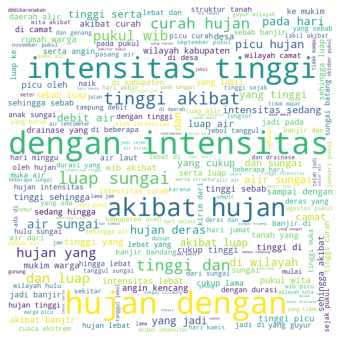

In [ ]:
from wordcloud import WordCloud

wordcloud1 = WordCloud(width = 900, height = 900, background_color ='white', min_font_size = 10).generate(w1)  
plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud1) 
plt.axis("off") 
  
plt.show()

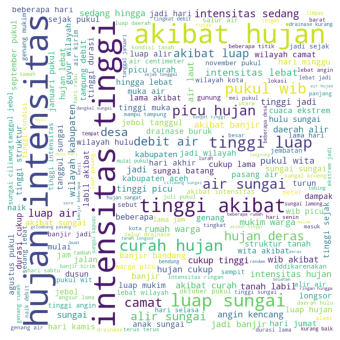

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud2 = WordCloud(width = 900, height = 900, background_color ='white', min_font_size = 10).generate(w2)  
plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud2) 
plt.axis("off") 
  
plt.show()

# Analysis

## Tanah Longsor

In [32]:
#membuat kolom "is_longsor" yang akan bernilai 1 apabila pada teks terdapat kata "longsor"
df2['is_longsor'] = np.where(df2['Penyebab'].str.contains("longsor"), 1, 0)
#Menampilkan jumlah laporan yang berisi kata "longsor"
df2['is_longsor'].sum()

57

In [33]:
#membuat kolom "is_tanah" yang akan bernilai 1 apabila pada teks terdapat kata "tanah"
df2['is_tanah'] = np.where(df2['Penyebab'].str.contains("tanah"), 1, 0)
#Menampilkan jumlah laporan yang berisi kata "tanah"
df2['is_tanah'].sum()

105

In [35]:
#menghitung jumlah row tiap-tiap kolom, dengan syarat terdapat kata "tanah" atau "longsor" pada penyebab
df2[(df['is_tanah'] > 0) | (df2['is_longsor'] > 0)].count()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


no            135
Penyebab      135
stem          135
tokens        135
is_longsor    135
is_tanah      135
dtype: int64

##Sampah

In [36]:
#membuat kolom "is_sampah" yang akan bernilai 1 apabila pada teks terdapat kata "sampah"
df2['is_sampah'] = np.where(df2['Penyebab'].str.contains("sampah"), 1, 0)
#Menampilkan jumlah laporan yang berisi kata "sampah"
df2['is_sampah'].sum()

25

##Angin

In [37]:
#membuat kolom "is_angin" yang akan bernilai 1 apabila pada teks terdapat kata "angin"
df2['is_angin'] = np.where(df2['Penyebab'].str.contains("angin"), 1, 0)
#Menampilkan jumlah laporan yang berisi kata "angin"
df2['is_angin'].sum()

96

In [39]:
#membuat kolom "is_angin_kencang" yang akan bernilai 1 apabila pada teks terdapat kata "angin kencang"
df2['is_angin_kencang'] = np.where(df2['Penyebab'].str.contains("angin kencang"), 1, 0)
#Menampilkan jumlah laporan yang berisi kata "angin kencang"
df2['is_angin_kencang'].sum()

80

In [40]:
#menghitung jumlah row tiap-tiap kolom, dengan syarat terdapat kata "angin" atau "angin kencang" pada penyebab
df2[(df['is_angin'] > 0) | (df2['is_angin_kencang'] > 0)].count()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


no                  94
Penyebab            94
stem                94
tokens              94
is_longsor          94
is_tanah            94
is_sampah           94
is_angin            94
is_angin_kencang    94
dtype: int64

##Hujan

In [42]:
#membuat kolom "is_hujan" yang akan bernilai 1 apabila pada teks terdapat kata "hujan"
df2['is_hujan'] = np.where(df2['Penyebab'].str.contains("hujan"), 1, 0)
#Menampilkan jumlah laporan yang berisi kata "hujan"
df2['is_hujan'].sum()

2351

##Luap

In [48]:
#membuat kolom "is_luap" yang akan bernilai 1 apabila pada teks terdapat kata "luap"
df2['is_luap'] = np.where(df2['Penyebab'].str.contains("luap"), 1, 0)
#Menampilkan jumlah laporan yang berisi kata "luap"
df2['is_luap'].sum()

963

##gelombang laut

In [43]:
#membuat kolom "is_gelombang" yang akan bernilai 1 apabila pada teks terdapat kata "gelombang"
df2['is_gelombang'] = np.where(df2['Penyebab'].str.contains("gelombang"), 1, 0)
#Menampilkan jumlah laporan yang berisi kata "gelombang laut"
df2['is_gelombang'].sum()

27

In [44]:
#membuat kolom "is_pasang" yang akan bernilai 1 apabila pada teks terdapat kata "pasang"
df2['is_pasang'] = np.where(df2['Penyebab'].str.contains("pasang"), 1, 0)
#Menampilkan jumlah laporan yang berisi kata "pasang"
df2['is_pasang'].sum()

90

In [45]:
#membuat kolom "is_rob" yang akan bernilai 1 apabila pada teks terdapat kata "rob"
df2['is_rob'] = np.where(df2['Penyebab'].str.contains(" rob "), 1, 0)
#Menampilkan jumlah laporan yang berisi kata "rob"
df2['is_rob'].sum()

8

In [46]:
#membuat kolom "is_air_laut" yang akan bernilai 1 apabila pada teks terdapat kata "air laut"
df2['is_air_laut'] = np.where(df2['Penyebab'].str.contains("air laut"), 1, 0)
#Menampilkan jumlah laporan yang berisi kata "air laut"
df2['is_air_laut'].sum()

70

In [47]:
#menghitung jumlah row tiap-tiap kolom, dengan syarat terdapat kata "pasang" atau "air laut" atau "rob" atau "gelombang" pada penyebab
df2[(df2['is_pasang'] > 0) | (df2['is_air_laut'] > 0) | (df2['is_rob'] > 0) | (df2['is_gelombang'] > 0)].count()

no                  109
Penyebab            109
stem                109
tokens              109
is_longsor          109
is_tanah            109
is_sampah           109
is_angin            109
is_angin_kencang    109
is_hujan            109
is_gelombang        109
is_pasang           109
is_rob              109
is_air_laut         109
dtype: int64

#Menghitung kemunculan kata

In [ ]:
#menghitung frekuensi kemunculan
from nltk.probability import FreqDist

kemunculan1 = nltk.FreqDist(justclean) #tanpa filter 
print("Tanpa filter stopword:\n",kemunculan1.most_common(),"\n\n")

kemunculan2 = nltk.FreqDist(fineclean) #dengan filter 
print("Dengan filter stopword:\n",kemunculan2.most_common())

Tanpa filter stopword:
 [('hujan', 2387), ('tinggi', 1958), ('dengan', 1947), ('intensitas', 1895), ('akibat', 1822), ('sungai', 1510), ('dan', 1206), ('yang', 1023), ('luap', 984), ('air', 785), ('di', 663), ('pukul', 430), ('picu', 391), ('jadi', 390), ('pada', 385), ('sehingga', 357), ('sebab', 356), ('banjir', 352), ('serta', 342), ('curah', 315), ('hari', 312), ('wilayah', 308), ('wib', 303), ('2021', 272), ('camat', 251), ('lebat', 244), ('kabupaten', 239), ('deras', 214), ('alir', 207), ('dari', 206), ('warga', 186), ('debit', 173), ('desa', 171), ('beberapa', 171), ('lama', 169), ('sedang', 160), ('hingga', 156), ('cukup', 154), ('rumah', 149), ('mukim', 148), ('ke', 134), ('oleh', 123), ('drainase', 123), ('hulu', 119), ('daerah', 109), ('sejak', 109), ('sampai', 108), ('genang', 106), ('tanah', 106), ('wita', 102), ('tanggal', 98), ('angin', 96), ('tidak', 95), ('pasang', 94), ('jebol', 92), ('laut', 90), ('tanggul', 89), ('00', 88), ('2020', 88), ('kencang', 82), ('centimete

In [ ]:
w2.count("hujan")

2387

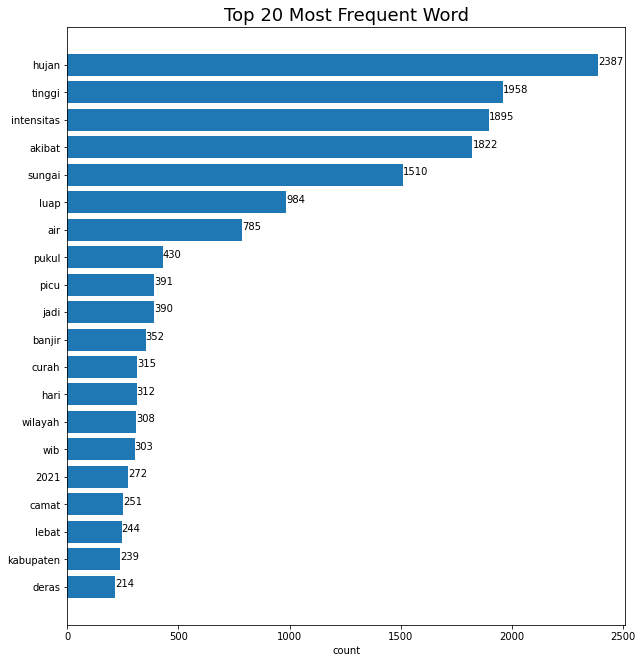

In [ ]:
y = ["hujan","tinggi","intensitas","akibat","sungai","luap","air","pukul","picu","jadi","banjir","curah","hari","wilayah","wib","2021","camat","lebat","kabupaten","deras"]
x = [2387,1958,1895,1822,1510,984,785,430,391,390,352,315,312,308,303,272,251,244,239,214]
plt.figure(figsize = (10, 11), facecolor = None) 
bars = plt.barh(y[::-1], x[::-1])
plt.title('Top 20 Most Frequent Word', fontsize=18)
plt.xlabel('count')
plt.xlim(0,2510)
for  bar in bars:
    width = bar.get_width()
    label_y = bar.get_y() + bar.get_height() / 2
    plt.text(width, label_y, s=f'{width}')
plt.show()